In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix


In [30]:
admissions=pd.read_csv("E://ML//datasets//Admission_Predict.csv")

In [92]:
admissions.shape


(400, 8)

In [32]:
admissions.isnull().values.any()

False

In [62]:
admissions.columns.tolist()

['GRE',
 'TOEFL',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'Admit']

In [41]:
admissions

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [43]:
admissions.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
hist = sns.distplot(Graduate['GRE'], hist = False, kde = True)
plt.title('Distribution of Gre Scores')
plt.show()

In [45]:
admissions.rename(columns = {'GRE Score':'GRE', 'TOEFL Score': 'TOEFL', 'Chance of Admit ': 'Admit', 'LOR ': 'LOR'}, inplace = True)
admissions

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


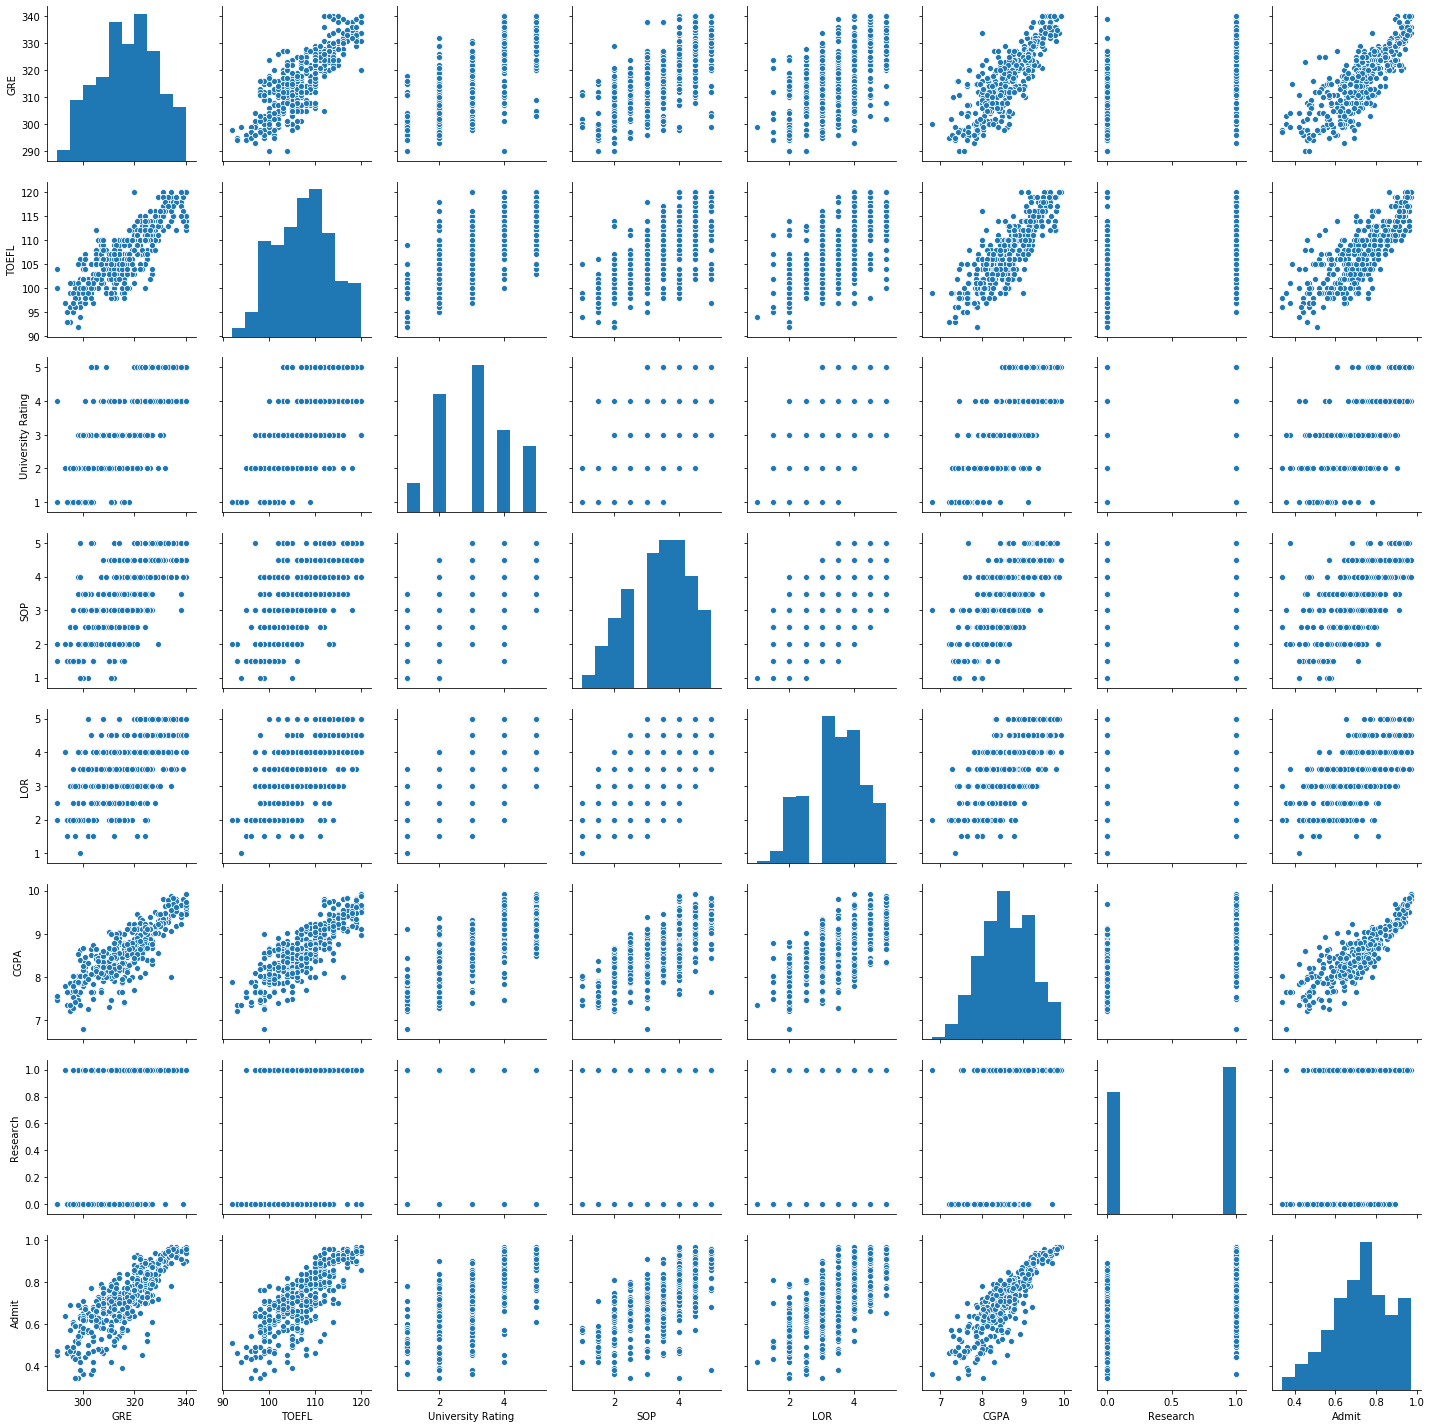

In [47]:
sns.pairplot(admissions)
plt.show()

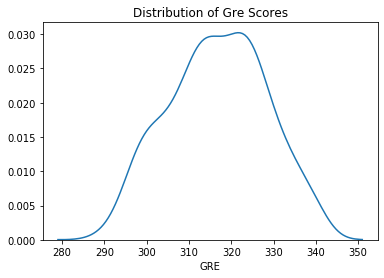

In [49]:
hist = sns.distplot(admissions['GRE'], hist = False, kde = True)
plt.title('Distribution of Gre Scores')
plt.show()

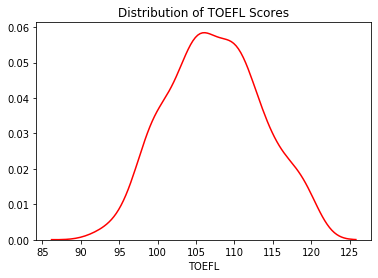

In [51]:
hist = sns.distplot(admissions['TOEFL'], hist = False, kde = True, color = 'red')
plt.title('Distribution of TOEFL Scores')
plt.show()

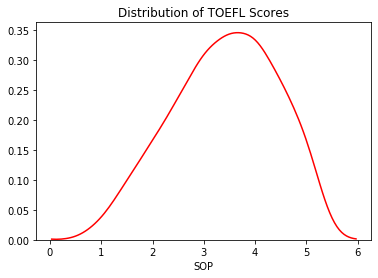

In [52]:
hist = sns.distplot(admissions['SOP'], hist = False, kde = True, color = 'red')
plt.title('Distribution of TOEFL Scores')
plt.show()

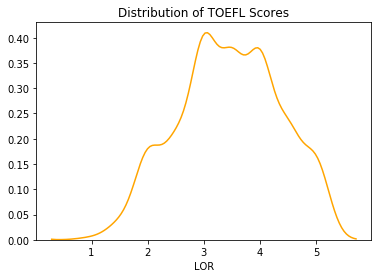

In [58]:
hist = sns.distplot(admissions['LOR'], hist = False, kde = True, color = 'orange')
plt.title('Distribution of TOEFL Scores')
plt.show()

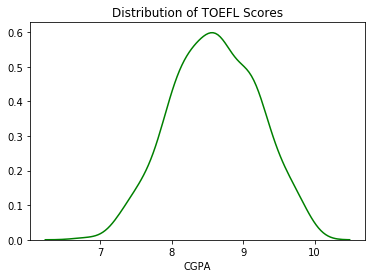

In [57]:
hist = sns.distplot(admissions['CGPA'], hist = False, kde = True, color = 'green')
plt.title('Distribution of TOEFL Scores')
plt.show()

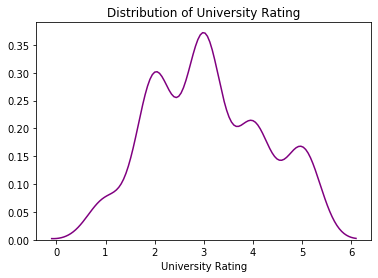

In [56]:
hist = sns.distplot(admissions['University Rating'], hist = False, kde = True, color = 'purple')
plt.title('Distribution of University Rating')
plt.show()

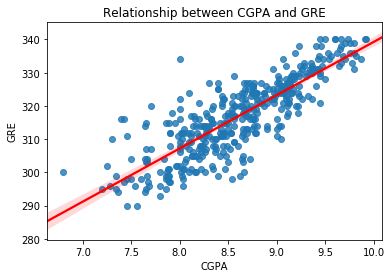

In [59]:
ax = sns.regplot(data = admissions, x ='CGPA', y= 'GRE', line_kws={'color':'red'}).set_title('Relationship between CGPA and GRE')
plt.show()

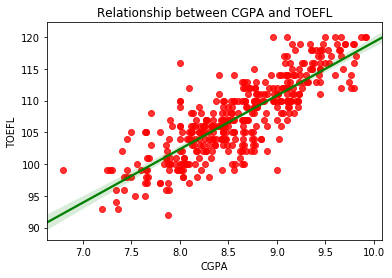

In [60]:
ax = sns.regplot(data = admissions, x ='CGPA', y= 'TOEFL', scatter_kws={'color':'red'},line_kws={'color':'green'}).set_title('Relationship between CGPA and TOEFL')
plt.show()


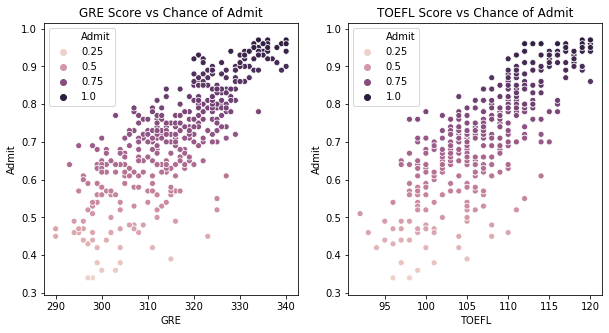

In [64]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(admissions['GRE'] , admissions['Admit']  , hue=admissions['Admit'], ax=ax[0])
sns.scatterplot(admissions['TOEFL'] , admissions['Admit'] ,hue=admissions['Admit'] , ax=ax[1])
ax[0].set_title('GRE Score vs Chance of Admit')
ax[1].set_title('TOEFL Score vs Chance of Admit')
plt.show()

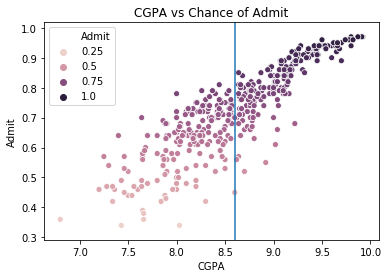

In [70]:
sns.scatterplot(admissions['CGPA'] , admissions['Admit'] ,hue=admissions['Admit'])
plt.axvline(admissions['CGPA'].mean())
plt.title('CGPA vs Chance of Admit')
plt.show()

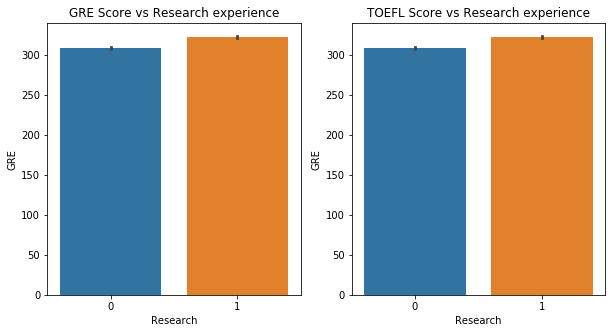

In [67]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(admissions['Research'] , admissions['GRE'] ,ax=ax[0])
sns.barplot(admissions['Research'] , admissions['GRE'] , ax=ax[1])
ax[0].set_title('GRE Score vs Research experience')
ax[1].set_title('TOEFL Score vs Research experience')
plt.show()

Text(0.5, 1.0, 'TOEFL Scores Split')

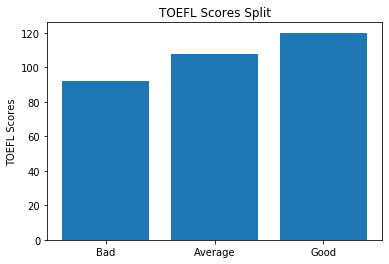

In [72]:
y = np.array([admissions['TOEFL'].min(), admissions['TOEFL'].mean(), admissions['TOEFL'].max()])
x = ['Bad', 'Average', 'Good']
plt.bar(x,y)
plt.ylabel('TOEFL Scores')
plt.title('TOEFL Scores Split')

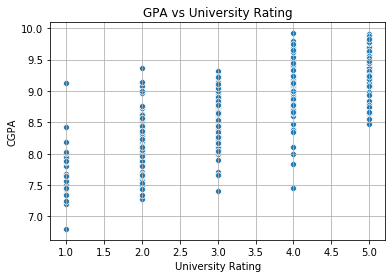

In [75]:
ax = sns.scatterplot(data = admissions, x = 'University Rating', y='CGPA')
plt.title('GPA vs University Rating')
plt.grid(True)

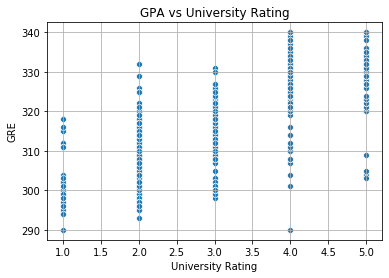

In [76]:
ax = sns.scatterplot(data = admissions, x = 'University Rating', y='GRE')
plt.title('GPA vs University Rating')
plt.grid(True)

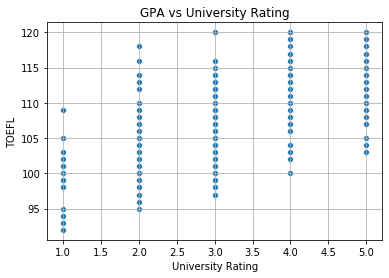

In [77]:
ax = sns.scatterplot(data = admissions, x = 'University Rating', y='TOEFL')
plt.title('GPA vs University Rating')
plt.grid(True)

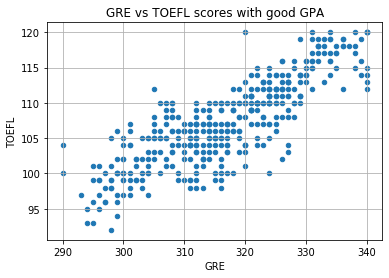

In [79]:
admissions1 = admissions[admissions.CGPA >= 0.85]
admissions1.plot(kind = 'scatter', x = 'GRE', y='TOEFL')
plt.title('GRE vs TOEFL scores with good GPA')
plt.grid(True)


In [86]:
def binary(admissions):
    if admissions['Admit']>0.8:
        return 1
    else:
        return 0
admissions['Admit'] = admissions.apply(binary, axis=1)
admissions1['Admit'] = admissions1.apply(binary, axis=1)

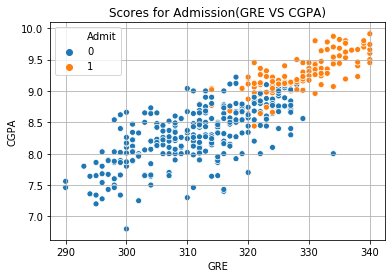

In [87]:
ax = sns.scatterplot(data = admissions1, x = 'GRE', y= 'CGPA', hue = 'Admit')
plt.title('Scores for Admission(GRE VS CGPA)')
plt.grid(True)

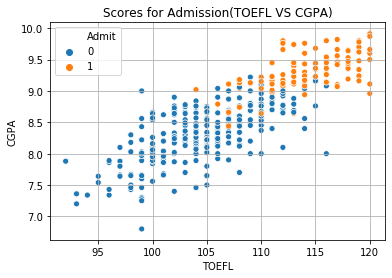

In [88]:
ax = sns.scatterplot(data = admissions1, x = 'TOEFL', y= 'CGPA', hue = 'Admit')
plt.title('Scores for Admission(TOEFL VS CGPA)')
plt.grid(True)

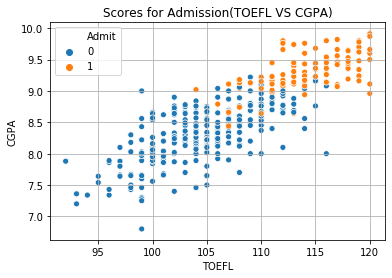

In [89]:
ax = sns.scatterplot(data = admissions1, x = 'TOEFL', y= 'CGPA', hue = 'Admit')
plt.title('Scores for Admission(TOEFL VS CGPA)')
plt.grid(True)

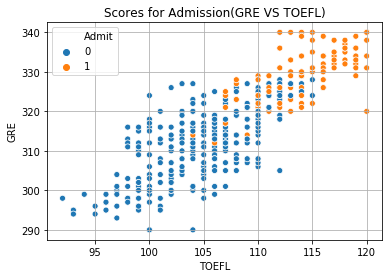

In [90]:
ax = sns.scatterplot(data = admissions1, x = 'TOEFL', y= 'GRE', hue = 'Admit')
plt.title('Scores for Admission(GRE VS TOEFL)')
plt.grid(True)

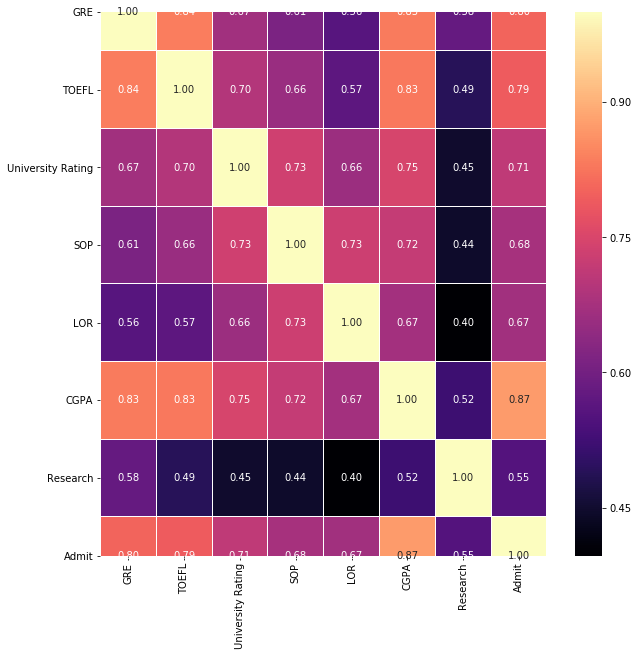

In [50]:
plt.figure(figsize=(10, 10))
sns.heatmap(admissions.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [91]:
admissions['Admit'].value_counts()

0    283
1    117
Name: Admit, dtype: int64

In [95]:
admissions[admissions['Admit']>0.8].groupby('Research')['University Rating'].median()

Research
0    4
1    4
Name: University Rating, dtype: int64

In [97]:
## training AND testing 
X=admissions.drop('Admit',axis=1)
Y=admissions['Admit']


In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [100]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (320, 7)
X_test (80, 7)
y_train (320,)
y_test (80,)


In [102]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.1,penalty='l1',random_state=0)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)


y_proba=lr.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)


E:\jar_files\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\jar_files\New folder\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Hata Oranı : 0.4590939824205543
Accurancy Oranı : 0.875
Logistic TRAIN score with  0.85625
Logistic TEST score with  0.875

[[49  2]
 [ 8 21]]


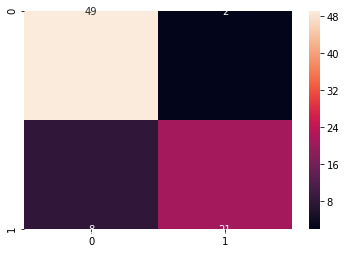

In [104]:
from sklearn.metrics import r2_score,accuracy_score

print('Hata Oranı :',r2_score(y_test,y_pred))
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("Logistic TRAIN score with ",format(lr.score(X_train, y_train)))
print("Logistic TEST score with ",format(lr.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

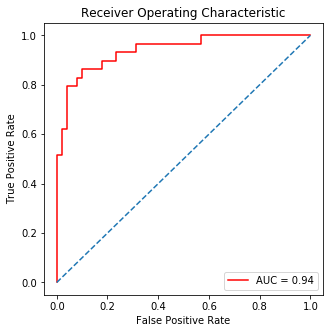

In [108]:
import sklearn.metrics as metrics
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
    

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=0.02,n_estimators=18,random_state=0)
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)

y_proba=gbc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_=(false_positive_rate,true_positive_rate,roc_auc)

Accurancy Oranı : 0.6375
GradientBoostingClassifier TRAIN score with  0.725
GradientBoostingClassifier TEST score with  0.6375

[[51  0]
 [29  0]]


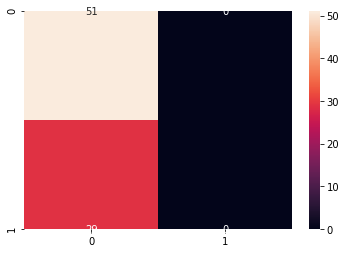

In [113]:
from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("GradientBoostingClassifier TRAIN score with ",format(gbc.score(X_train, y_train)))
print("GradientBoostingClassifier TEST score with ",format(gbc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()